/Users/samuelmarini/Desktop/new_test/lab_diags/hdf5
timesteps: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]
Read file /Users/samuelmarini/Desktop/new_test/lab_diags/hdf5/data00000060.h5 for species: electrons
['dt', 'time', 'timestep', 'timeUnitSI', 'species', 'w', 'ux', 'uy', 'uz', 'x', 'y', 'z', 'gamma_part', 'energy_part', 'gamma_selection_min', 'vz', 'charge', 'N', 'energy_mean', 'energy_med', 'energy_std', 'energy_mad', 'energy_std_perc', 'energy_mad_perc', 'gamma_mean', 'gamma_median', 'gamma_std', 'gamma_mad', 'beta_mean', 'sigma_x', 'sigma_y', 'sigma_z', 'xp', 'yp', 'sigma_xp', 'sigma_yp', 'div_x', 'div_y', 'x_ave', 'y_ave', 'z_ave', 'xx_ave', 'yy_ave', 'ux_ave', 'uy_ave', 'uz_ave', 'xp_ave', 'yp_ave', 'xpxp_ave', 'ypyp_ave', 'xxp_ave', 'yyp_ave', 'emit_rms_x', 'emit_rms_y', 'emit_norm_r

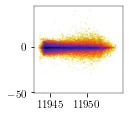

In [51]:
import os, os.path, re, shutil
import stat,time, math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.colors as mcolors


from random import choice
from matplotlib import *
from matplotlib.pyplot import *
from pylab import *


from numpy import *
import numpy as np
import matplotlib.pyplot as plt

import skypiea

import matplotlib.ticker as ticker
import matplotlib.colors as colors
from matplotlib import patches
import seaborn as sns
import pandas as pd
import scipy.constants as const

xname = r'$z$'
yname = r'Energy, MeV'

id=25

sizex=4/2.51
sizey=4/2.51
fs=11

# Plota o mapa interpolado com a escala de cores logarítmica
fig, ax = plt.subplots(figsize=(sizex,sizey))
plt.rc('text',usetex=True)
plt.rc('font', **{'family': 'serif'  })
plt.rc('xtick',labelsize=fs)
plt.rc('ytick',labelsize=fs)
plt.rc('axes',linewidth=0.4)


# Selection of the directory with data
directory = os.getcwd() + '/lab_diags'

steps = skypiea.Steps(directory=directory,source='fbpic',verbose=True)
timestep = 60
step = skypiea.Step()
step = steps.getParticle(step,timestep,species='electrons',gamma_selection_min=10.)
step = steps.getField(step,timestep)
print(step.keys())



xplotdata = step.z * 1e6
yplotdata = step.x * 1e6
ene = step.gamma_part

print(np.max(xplotdata))
print(np.max(yplotdata))

xrange = 450 *1e6
yrange = 20*step.sigma_x*1e6

xname = '$x$, $\mu$m'
yname = "$x$', mrad"
zname = "$en$"

w=step.w
w=step.gamma_part
df = pd.DataFrame({xname:xplotdata, yname:yplotdata, zname:ene, 'w':w})


df = df.drop(df[df[zname] <  220].index)
df = df.drop(df[df[yname] < -yrange].index)
df = df.drop(df[df[yname] >  yrange].index)

binsX = 100
binsY = 100
H, xedges, yedges = np.histogram2d(df[xname].to_numpy(), df[yname].to_numpy(), bins=(binsX, binsY), weights=df['w'].to_numpy())
X, Y = np.meshgrid(xedges, yedges)
H = H.T * const.e * 1e12

ax.grid(False)
ax.grid(False)
plt.scatter(X[:binsX, :binsY].flatten(), Y[:binsX, :binsY].flatten(), c=H[:binsX, :binsY].flatten(), cmap='CMRmap_r', norm=colors.LogNorm(), rasterized=True ,s=0.5)

# salvar figura
plt.savefig('fig.png',  bbox_inches='tight', dpi=300, rasterized=True)

/Users/samuelmarini/Desktop/new_test/lab_diags/hdf5
timesteps: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]
Read file /Users/samuelmarini/Desktop/new_test/lab_diags/hdf5/data00000020.h5 for species: electrons
3954.5452280162067
3.5469001290763824


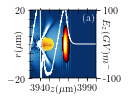

In [79]:
import os
import os.path
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.colors as mcolors
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from scipy.interpolate import interp2d
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


import skypiea


# Selection of the directory with data
directory = os.getcwd() + '/lab_diags'

steps = skypiea.Steps(directory=directory,source='fbpic',verbose=True)
#timestep = steps.timesteps[-1]
timestep = 20
step = skypiea.Step()
step = steps.getParticle(step,timestep,species='electrons',gamma_selection_min=150.)
step = steps.getField(step,timestep)
#print(step.keys())

npar=1000
xnew = np.linspace(np.min(step.zfield)*1e6, np.max(step.zfield)*1e6, npar)
ynew = np.linspace(np.min(step.rfield)*1e6, np.max(step.rfield)*1e6, npar)
Xnew, Ynew = np.meshgrid(xnew, ynew)


# Interpola os valores de simu.ne para a nova grade Xnew, Ynew
f_ne = interp2d(step.zfield*1e6, step.rfield*1e6, step.ne, kind='linear')
Z = f_ne(xnew, ynew)


sizex=3/2.54
sizey=4/2.54
fs=10

# Plota o mapa interpolado com a escala de cores logarítmica
fig, ax = plt.subplots(figsize=(sizex,sizey))
#plt.figure(1, figsize=(sizex,sizey)); plt.clf()
plt.rc('text',usetex=True)
plt.rc('font', **{'family': 'serif'  })
plt.rc('xtick',labelsize=fs)
plt.rc('ytick',labelsize=fs)
plt.rc('axes',linewidth=0.4)
ax.set_facecolor('none') # ou ax.set_facecolor('transparent')
#ax=plt.subplots_adjust(bottom=0.1,left=0.15,right=0.95,top=0.95)


Z_mask = np.abs(np.ma.masked_array(Z, np.abs(Z) >np.abs(Z).max() * 0.5))
ax.grid(False)
#ax.pcolormesh(xnew, ynew,Z_mask, cmap='RdPu_r', vmin=0.1e+24, vmax= 3.3e+24)
ax.pcolormesh(xnew, ynew,Z_mask, cmap='Blues_r', vmin=0.1e+24, vmax= 3.3e+24)
#ax.pcolormesh(xnew, ynew, Z_mask, cmap='Blues_r', norm=LogNorm(vmin=0.1e+20, vmax=4e+24))
#ax.pcolormesh(xnew, ynew,Z, cmap='binary', vmin=0.1e+24, vmax= 3.3e+24)

ax.set_ylim(-20, 20)
xmean=step.zfieldMin*1e6+(step.zfieldMax*1e6-step.zfieldMin*1e6)/2
ax.set_xlim(xmean-35, xmean+35)


nparl=npar
xnewl = np.linspace(np.min(step.zfield)*1e6, np.max(step.zfield)*1e6, nparl)
ynewl = np.linspace(np.min(step.rfield)*1e6, np.max(step.rfield)*1e6, nparl)
Xnewl, Ynewl = np.meshgrid(xnewl, ynewl)


# Interpola os valores de simu.ne para a nova grade Xnew, Ynew
f_Ey = interp2d(step.zfield * 1e6, step.rfield * 1e6, step.Ey2d_env, kind='linear')
ZeY = f_Ey(xnewl, ynewl)

Ey2d_env_mask = np.abs(np.ma.masked_array(ZeY, np.abs(ZeY) < np.abs(ZeY).max() * 0.5))
ax.grid(False)
ax.pcolormesh(xnewl,ynewl,Ey2d_env_mask,cmap='hot')


ax.set_ylabel('$r(\mu$m$)$', fontsize=fs)
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.set_xlabel('$z(\mu$m$)$', fontsize=fs)
ax.xaxis.set_label_coords(0.5, -0.2)

ax.set_ylim(-20, 20)
ax.set_yticks([-20,20])
ax.set_xticks([xmean-25,xmean+25])
#ax.ticks_on()
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(10))

ax.tick_params(which='minor', length=5, width=0.5, direction='inout')
ax.tick_params(which='both', direction='inout')
# ax.yaxis.tick_right()
# ax.xaxis.tick_top()
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.text(step.zfieldMax*1e6-9, 15, '(a)', fontsize=fs, ha='center', va='center', color='white')




#######################################
xplotdata = step.z * 1e6
yplotdata = np.sqrt( (step.x * 1e6)**2+(step.y * 1e6)**2 )*np.arctan2(step.x,step.y)/np.pi
ene = step.gamma_part
#ene = step.w

print(np.max(xplotdata))
print(np.max(yplotdata))

xrange = 450 *1e6
yrange = 20*step.sigma_x *1e6

xname = '$x$, $\mu$m'
yname = "$x$', mrad"
zname = "$en$"

w=step.w
w=step.gamma_part
df = pd.DataFrame({xname:xplotdata, yname:yplotdata, zname:ene, 'w':w})


df = df.drop(df[df[zname] <  200].index)
df = df.drop(df[df[yname] < -yrange].index)
df = df.drop(df[df[yname] >  yrange].index)

binsX = 500
binsY = 500
H, xedges, yedges = np.histogram2d(df[xname].to_numpy(), df[yname].to_numpy(), bins=(binsX, binsY), weights=df['w'].to_numpy())
X, Y = np.meshgrid(xedges, yedges)
H = H.T * const.e * 1e12

plt.scatter(X[:binsX, :binsY].flatten(), Y[:binsX, :binsY].flatten(), c=H[:binsX, :binsY].flatten(), cmap='plasma_r', norm=colors.LogNorm(), rasterized=True ,s=0.1, zorder = 3)

##########################

ax2 = ax.twinx()
ax2.plot(step.zfield*1e6,step.Ez*1e-9, 'w-', lw=1)
ax2.set_ylim(-100,100)
ax2.grid(False)
ax2.set_ylabel('$E_z(GV)m^{-}$', fontsize=fs, rotation=-90)
ax.xaxis.set_label_coords(0.5, -0.1)
ax2.set_yticks([-100, 100])  # Modifique esta linha
ax2.set_yticklabels(["-100", "100"])  # Adicione esta linha
ax2.yaxis.set_label_coords(1.2, 0.5)

# # Colorbar para Ey2d_env_mask (Campo elétrico)
# ax_cbar_Ey = inset_axes(ax, width="50%", height="5%", loc='upper left', borderpad=-2)
# norm_Ey = mcolors.Normalize(vmin=np.min(Ey2d_env_mask), vmax=np.max(Ey2d_env_mask))
# cbar_Ey = plt.colorbar(plt.cm.ScalarMappable(norm=norm_Ey, cmap='hot'), cax=ax_cbar_Ey, orientation='horizontal')
# cbar_Ey.ax.xaxis.set_ticks_position('top')
# cbar_Ey.ax.tick_params(labelsize=fs-2)
# cbar_Ey.set_label('$E_y$(GV)', fontsize=fs-3, labelpad=-25)
# cbar_Ey.set_ticks([np.min(Ey2d_env_mask), np.max(Ey2d_env_mask)])
# cbar_Ey.ax.set_xticklabels(['{:.0f}'.format(np.min(Ey2d_env_mask) / 1e+12), '{:.0f}'.format(np.max(Ey2d_env_mask) / 1e+12)])

# # Colorbar para densidade
# ax_cbar_ne = inset_axes(ax, width="50%", height="5%", loc='upper right', borderpad=-2)
# norm_ne = mcolors.Normalize(vmin=0.1e+24, vmax=3.3e+24)
# cbar_ne = plt.colorbar(plt.cm.ScalarMappable(norm=norm_ne, cmap='Blues_r'), cax=ax_cbar_ne, orientation='horizontal')
# cbar_ne.ax.xaxis.set_ticks_position('top')
# cbar_ne.ax.tick_params(labelsize=fs-2)
# cbar_ne.set_label('$n_e$(x$10^{24}m^{-3}$)', fontsize=fs-3, labelpad=-30)
# cbar_ne.set_ticks([0.1e+24, 3.3e+24])
# cbar_ne.ax.set_xticklabels(['0.1', '3.3'])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.8)


plt.savefig(f'fig_timestep={timestep}.png',dpi=300)
#plt.savefig('fig.png', bbox_inches='tight',dpi=300)

/Users/samuelmarini/Desktop/new_test/lab_diags/hdf5
timesteps: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]
Read file /Users/samuelmarini/Desktop/new_test/lab_diags/hdf5/data00000060.h5 for species: electrons
Total charge in the histogram: 6.440476409106426
(201, 201)
(201, 201)
(200, 200)


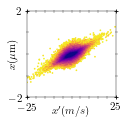

In [54]:
import os, os.path, re, shutil
import stat,time, math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.colors as mcolors


from random import choice
from matplotlib import *
from matplotlib.pyplot import *
from pylab import *


from numpy import *
import numpy as np
import matplotlib.pyplot as plt

import skypiea


import matplotlib.ticker as ticker
import matplotlib.colors as colors
from matplotlib import patches
import seaborn as sns
import pandas as pd
import scipy.constants as const
import matplotlib.gridspec as gridspec

# ...

# Substitua esta linha:
# fig, ax = plt.subplots(figsize=(sizex,sizey))




xname = r'$z$'
yname = r'Energy, MeV'

id=35



sizex=4/2.51
sizey=4/2.51
fs=11

# Plota o mapa interpolado com a escala de cores logarítmica
fig, ax = plt.subplots(figsize=(sizex,sizey))
plt.rc('text',usetex=True)
plt.rc('font', **{'family': 'serif'  })
plt.rc('xtick',labelsize=fs)
plt.rc('ytick',labelsize=fs)
plt.rc('axes',linewidth=0.4)


# Selection of the directory with data
directory = os.getcwd() + '/lab_diags'

steps = skypiea.Steps(directory=directory,source='fbpic',verbose=True)
#timestep = steps.timesteps[-1]
timestep = 60
step = skypiea.Step()
step = steps.getParticle(step,timestep,species='electrons',gamma_selection_min=150.)
step = steps.getField(step,timestep)



xplotdata = step.x * 1e6
yplotdata = step.ux 

xrange = 20*step.sigma_x *1e6
yrange = 2

xname = 'x'
yname = "vx"
w=step.gamma_part
df = pd.DataFrame({xname:xplotdata, yname:yplotdata, 'w':w})

df = df.drop(df[df[xname] < -xrange].index)
df = df.drop(df[df[xname] > xrange].index)

df = df.drop(df[df[yname] < -yrange].index)
df = df.drop(df[df[yname] > yrange].index)

binsX = 200
binsY = 200
H, xedges, yedges = np.histogram2d(df[xname].to_numpy(), df[yname].to_numpy(), bins=(binsX, binsY), weights=df['w'].to_numpy())
X, Y = np.meshgrid(xedges, yedges)
H = H.T * const.e * 1e12
vmin = 0.9*H[:binsX, :binsY].min()
vmax = 0.1*H[:binsX, :binsY].max()

#plt.scatter(X[:binsX, :binsY].flatten(), Y[:binsX, :binsY].flatten(), c=H[:binsX, :binsY].flatten(), cmap='YlOrRd',vmin=vmin,vmax=vmax, rasterized=True ,s=0.5)
#plt.scatter(X[:binsX, :binsY].flatten(), Y[:binsX, :binsY].flatten(), c=H[:binsX, :binsY].flatten(), cmap='YlOrRd',norm=colors.LogNorm(), rasterized=True ,s=0.5)
#plt.scatter(X[:binsX, :binsY].flatten(), Y[:binsX, :binsY].flatten(), c=H[:binsX, :binsY].flatten(), cmap='plasma_r',norm=colors.LogNorm(), rasterized=True ,s=0.5)
plt.scatter(X[:binsX, :binsY].flatten(), Y[:binsX, :binsY].flatten(), c=H[:binsX, :binsY].flatten(), cmap='plasma_r',norm=colors.LogNorm(vmin=0.00005, vmax=0.01), rasterized=True ,s=0.5)






# definir limites dos eixos x e y
ax.set_xlim([np.min(X), np.max(X)])
ax.set_ylim([np.min(Y), np.max(Y)])

# adicionar rótulos dos eixos x e y
ax.set_xlabel(xname, fontsize=fs)
ax.set_ylabel(yname, fontsize=fs)

# adicionar barra de cores
# cbar = fig.colorbar(ax.collections[0], ax=ax)
# cbar.ax.set_ylabel('Charge (pC)', fontsize=fs)


print('Total charge in the histogram: ' + str(H.sum()))
print(X.shape)
print(Y.shape)
print(H.shape)

ax.set_ylabel('$x(\mu$m$)$', fontsize=fs)
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.set_xlabel('$x^\prime(m/s)$', fontsize=fs)
ax.xaxis.set_label_coords(0.5, -0.1)

# ax.set_ylim(-25, 25)
# ax.set_yticks([-25,25])
# ax.set_xticks([-25,25])
# ax.ticks_on()
# ax.yaxis.set_minor_locator(MultipleLocator(5))
# ax.xaxis.set_minor_locator(MultipleLocator(5))

# ax.tick_params(which='minor', length=4, width=0.4, direction='out')
# ax.tick_params(which='both', direction='inout')
# ax.yaxis.tick_right()
# ax.xaxis.tick_top()
# ax.xaxis.set_ticks_position('both')
# ax.yaxis.set_ticks_position('both')



ax.set_ylim(-2, 2)
ax.set_yticks([-2,2])
ax.set_xlim(-25, 25)
ax.set_xticks([-25,25])
#ax.ticks_on()
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(5))

ax.tick_params(which='minor', length=3, width=0.3, direction='out')
ax.tick_params(which='both', direction='inout')
# ax.yaxis.tick_right()
# ax.xaxis.tick_top()
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')



# salvar figura
plt.savefig('fig_0.png',  bbox_inches='tight', dpi=300, rasterized=True)